<a href="https://colab.research.google.com/github/premchku/IBM/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import ExtraTreesRegressor
from scipy import stats

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set()


In [3]:
#Reading datasets
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

#define train target
target=train['SalePrice']

#Combining train and test dataset for preprocessing
all_df=pd.concat([train,test], ignore_index=True,sort=False)

#Dropping SalePrice
all_df.drop('SalePrice',axis=1,inplace=True)

In [4]:
missings_df={}
for key in all_df.columns:
    if all_df[key].isnull().sum() > 0:
        missings_df[key]=(all_df[key].isnull().sum()  /  len(all_df[key]) ) * 100

#Create missing values dataframe
missings_df=pd.DataFrame(missings_df,index=['MissingValues']).T.sort_values(by='MissingValues',ascending=False)

Text(0.5, 1.0, 'The percentage of missing values per column')

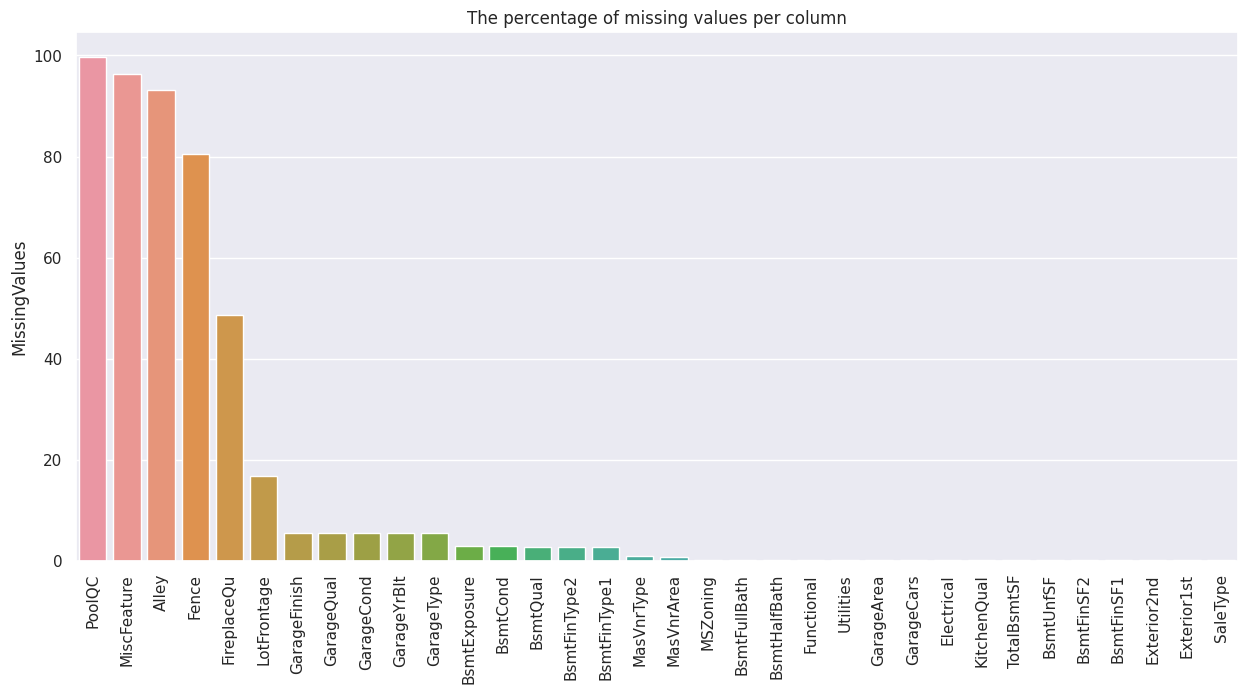

In [5]:
#Plotting the percentage of missing values per column
plt.figure(figsize=(15,7),dpi=100)
plt.xticks(rotation=90)
sns.barplot(y=missings_df.MissingValues,x=missings_df.index, orient='v').set_title('The percentage of missing values per column')

In [6]:
#Sort transposed describe() by count
all_df.describe(include='object').T.sort_values(by=['count']).head(10)

,count,unique,top,freq
PoolQC,10,3,Ex,4
MiscFeature,105,4,Shed,95
Alley,198,2,Grvl,120
Fence,571,4,MnPrv,329
FireplaceQu,1499,5,Gd,744
GarageCond,2760,5,TA,2654
GarageQual,2760,5,TA,2604
GarageFinish,2760,3,Unf,1230
GarageType,2762,6,Attchd,1723
BsmtExposure,2837,4,No,1904


In [7]:
#Get the number of FirePlaces where Fire Place quality is missing
all_df[['FireplaceQu','Fireplaces']][all_df.FireplaceQu.isnull()]

,FireplaceQu,Fireplaces
0,NaN,0
5,NaN,0
10,NaN,0
12,NaN,0
15,NaN,0
...,...,...
2912,NaN,0
2913,NaN,0
2914,NaN,0
2915,NaN,0


Text(0, 0.5, 'The number of houses')

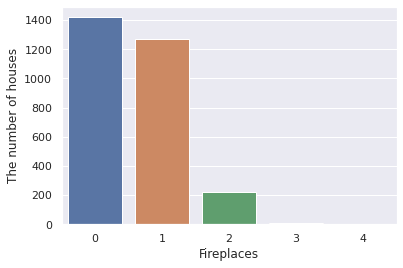

In [8]:
#Countplot the number of fireplaces
sns.countplot(x=all_df['Fireplaces'])
plt.ylabel('The number of houses')

In [9]:
#Get Garage car capacity where GarageQual is missing
all_df[['GarageQual','GarageCars']][all_df.GarageQual.isnull()]

,GarageQual,GarageCars
39,NaN,0.0
48,NaN,0.0
78,NaN,0.0
88,NaN,0.0
89,NaN,0.0
...,...,...
2893,NaN,0.0
2909,NaN,0.0
2913,NaN,0.0
2914,NaN,0.0


Text(0.5, 0, 'The car capacity of garage')

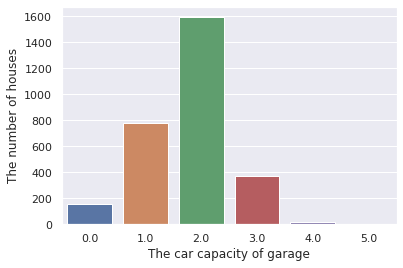

In [10]:
#Countplot the capacity of garages
sns.countplot(x=all_df['GarageCars'])
plt.ylabel('The number of houses')
plt.xlabel('The car capacity of garage')

In [11]:
#Filling missing values for categorical features
all_df['Alley'].fillna('NA',inplace=True)
all_df['PoolQC'].fillna('NA',inplace=True)
all_df['Fence'].fillna('NA',inplace=True)
all_df['MiscFeature'].fillna('NA',inplace=True)
all_df['FireplaceQu'].fillna('NA',inplace=True)
all_df['GarageCond'].fillna('NA',inplace=True)
all_df['GarageQual'].fillna('NA',inplace=True)
all_df['GarageFinish'].fillna('NA',inplace=True)
all_df['GarageType'].fillna('NA',inplace=True)
all_df['BsmtExposure'].fillna('NA',inplace=True)
all_df['BsmtFinType2'].fillna('NA',inplace=True)
all_df['BsmtFinType1'].fillna('NA',inplace=True)
all_df['BsmtQual'].fillna('NA',inplace=True)
all_df['BsmtCond'].fillna('NA',inplace=True)

In [12]:
#Number of missing values for MasVnrType + unique categories
print("Number of missing values : ", all_df['MasVnrType'].isnull().sum())
print("Categories:", all_df['MasVnrType'].unique() )

Number of missing values :  24
Categories: ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]


In [13]:
#Fill MasVnrType missing values with 'None'
all_df['MasVnrType'].fillna('None',inplace=True)

In [14]:
#Getting categories for Electrical feature
print("Number of missing values : ", all_df['Electrical'].isnull().sum())
print("Categories:", all_df['Electrical'].unique() )

Number of missing values :  1
Categories: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


In [15]:
#Fill with top freq
all_df['Electrical'].fillna('SBrkr',inplace=True)
 

In [16]:
#Fill with top freq
all_df['MSZoning'].fillna('RL',inplace=True)
all_df['Utilities'].fillna('AllPub',inplace=True)
all_df['Functional'].fillna('Typ',inplace=True)
all_df['SaleType'].fillna('WD',inplace=True)
all_df['Exterior2nd'].fillna('VinylSd',inplace=True)
all_df['Exterior1st'].fillna('VinylSd',inplace=True)
all_df['KitchenQual'].fillna('TA',inplace=True)

In [17]:
#sorting transposed describe() by count 
all_df.describe().T.sort_values(by='count').head(10)

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
GarageYrBlt,2760.0,1978.113406,25.574285,1895.0,1960.0,1979.0,2002.0,2207.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtHalfBath,2917.0,0.061364,0.245687,0.0,0.0,0.0,0.0,2.0
BsmtFullBath,2917.0,0.429894,0.524736,0.0,0.0,0.0,1.0,3.0
GarageCars,2918.0,1.766621,0.761624,0.0,1.0,2.0,2.0,5.0
GarageArea,2918.0,472.874572,215.394815,0.0,320.0,480.0,576.0,1488.0
TotalBsmtSF,2918.0,1051.777587,440.766258,0.0,793.0,989.5,1302.0,6110.0
BsmtUnfSF,2918.0,560.772104,439.543659,0.0,220.0,467.0,805.5,2336.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


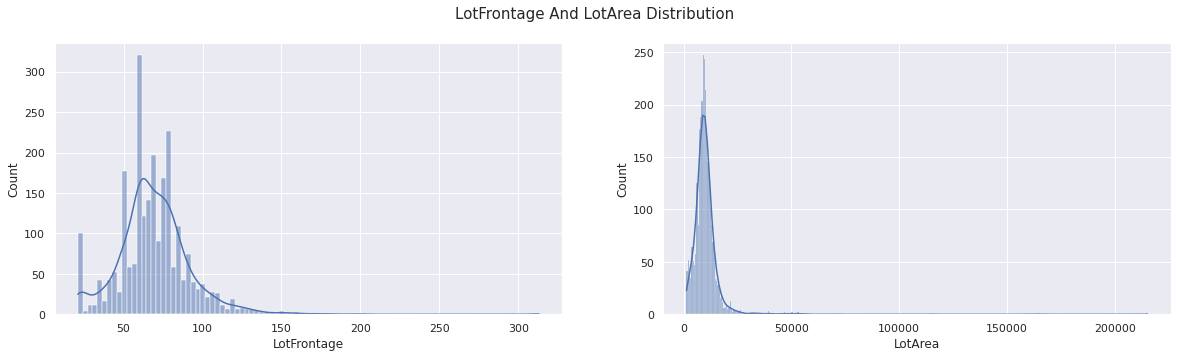

In [18]:
#Plot Lotfrontage and LotArea distribution
fig,ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('LotFrontage And LotArea Distribution',size=15)
sns.histplot(x=all_df.LotFrontage,kde=True, ax=ax[0])
sns.histplot(x=all_df.LotArea,kde=True, ax=ax[1])


In [19]:
#Temp dataframe
Lot_tmp=all_df[['LotFrontage','LotArea']][~all_df.LotFrontage.isnull()]
#Calculating z-score to remove outliers
z = np.abs(stats.zscore(Lot_tmp))
#remove outliers
Lot_tmp_Z=Lot_tmp[(z < 3).all(axis=1)]


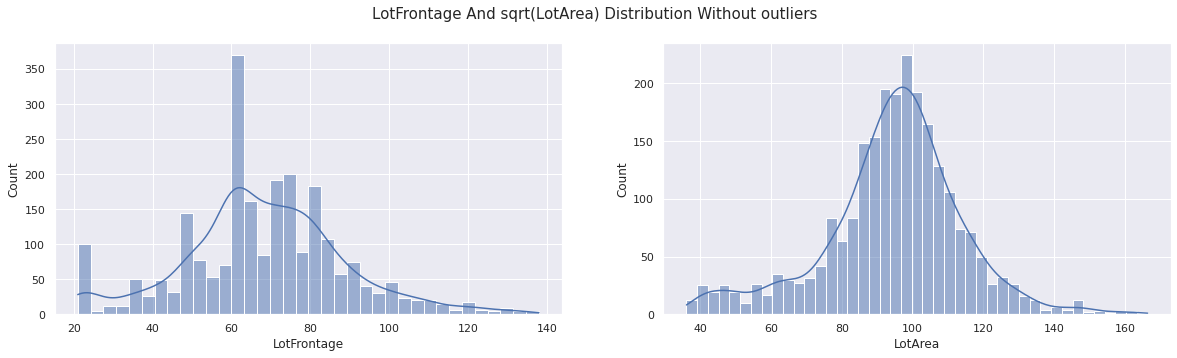

In [20]:
##Plot Lotfrontage and LotArea distribution without outliers
fig,ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('LotFrontage And sqrt(LotArea) Distribution Without outliers',size=15)
sns.histplot(x=Lot_tmp_Z.LotFrontage,kde=True, ax=ax[0])
sns.histplot(x=Lot_tmp_Z.LotArea.apply(np.sqrt),kde=True, ax=ax[1])

[Text(0.5, 1.0, 'Relation Between LotFrontage And Sqrt(LotArea)')]

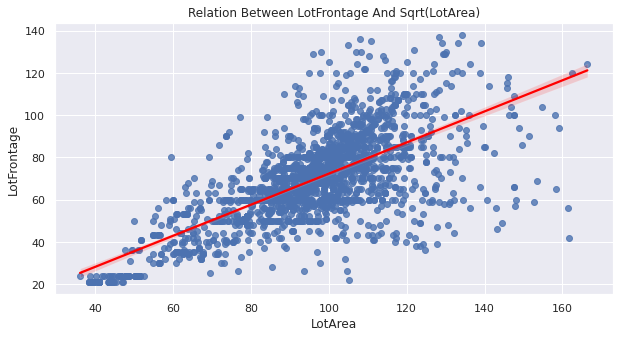

In [21]:
# Plotting LotFrontage and LotArea
plt.figure(figsize=(10,5))
sns.regplot(x=Lot_tmp_Z.LotArea.apply(np.sqrt),y=Lot_tmp_Z.LotFrontage,
            line_kws={"color": "red"}).set(title='Relation Between LotFrontage And Sqrt(LotArea)')

Text(0.5, 1.0, 'GarageCars and LotFrontage')

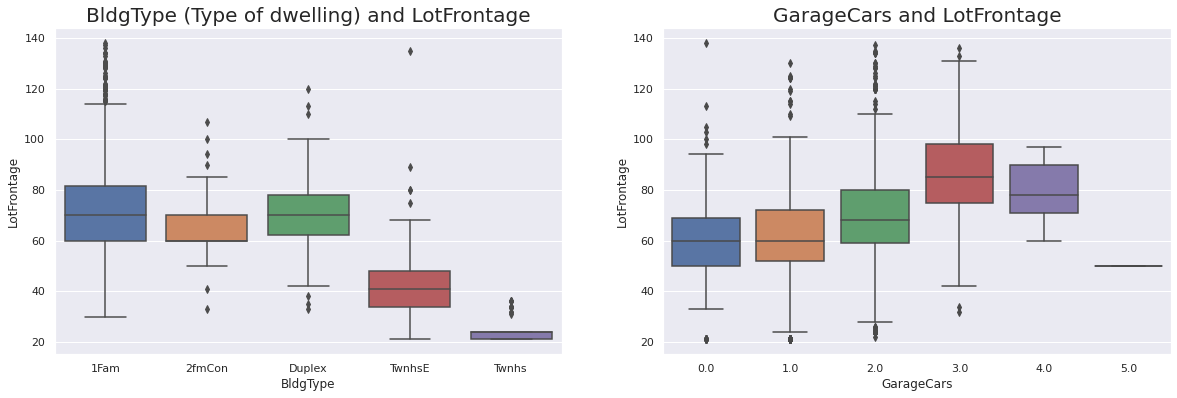

In [22]:
#Relation between BldgType and LotFrontage
fig,ax = plt.subplots(1,2, figsize=(20,6))
sns.boxplot(x=all_df.BldgType,y=Lot_tmp_Z.LotFrontage, ax=ax[0]).set_title('BldgType (Type of dwelling) and LotFrontage',fontsize = 20)
sns.boxplot(x=all_df.GarageCars,y=Lot_tmp_Z.LotFrontage, ax=ax[1]).set_title('GarageCars and LotFrontage',fontsize = 20)

Text(0.5, 1.0, 'LotArea And Neighborhood')

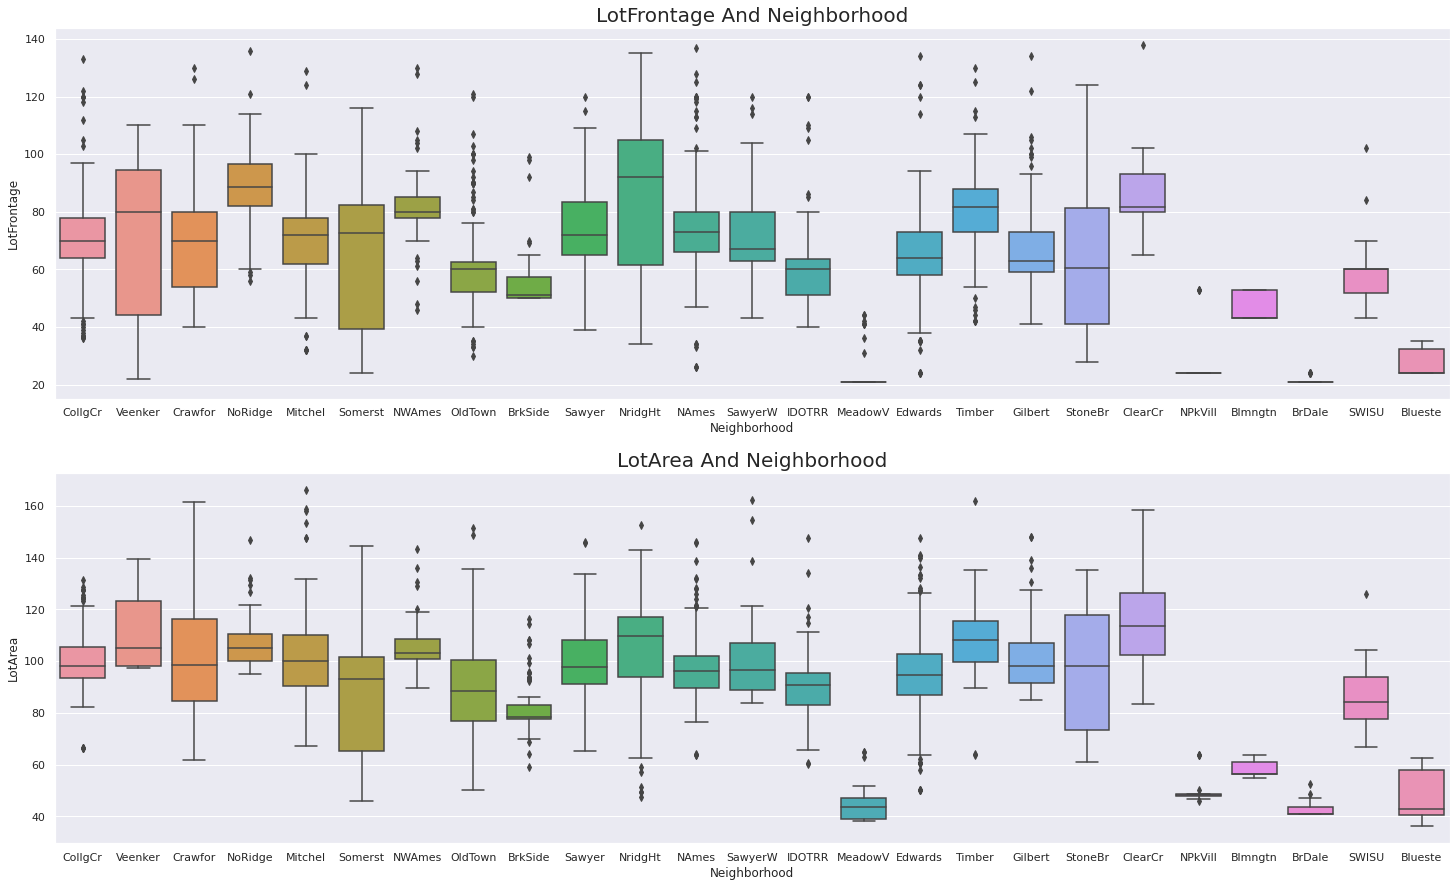

In [23]:
# Plotting LotFrontage, LotArea and Neighborhood
fig,ax=plt.subplots(2,1,figsize=(25,15))
sns.boxplot(x=all_df.Neighborhood,y=Lot_tmp_Z.LotFrontage,ax=ax[0]).set_title('LotFrontage And Neighborhood',fontsize=20)
sns.boxplot(x=all_df.Neighborhood,y=Lot_tmp_Z.LotArea.apply(np.sqrt),ax=ax[1]).set_title('LotArea And Neighborhood',fontsize=20)

Text(0.5, 1.0, 'Neighborhood And SalePrice')

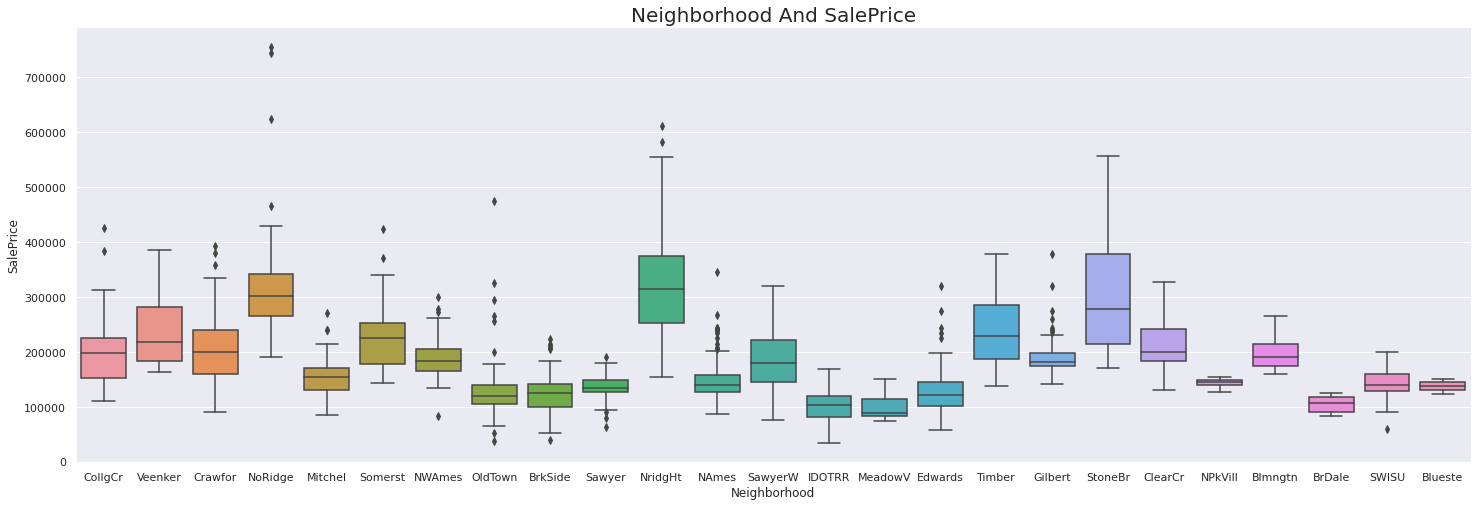

In [24]:
fig,ax=plt.subplots(1,1,figsize=(25,8))
sns.boxplot(x=all_df[:1460].Neighborhood , y=target).set_title('Neighborhood And SalePrice',fontsize=20)

In [25]:
#Creating temp dataframe and converting objects to dummies
LotFrontage_df=pd.get_dummies(all_df[['LandSlope','BldgType','Alley','LotConfig','MSZoning','Neighborhood','LotArea','LotFrontage']].copy())
#Replace Lotarea with it's Sqrt
LotFrontage_df['LotArea']=LotFrontage_df['LotArea'].apply(np.sqrt)

#Mask to access part of the dataframe with available LotFrontage
mask=~LotFrontage_df.LotFrontage.isnull()
#train dataset (including LotFrontage)
LotFrontage_train=LotFrontage_df.loc[mask]
#test dataset (Missing LotFrontage)
LotFrontage_Test=LotFrontage_df.loc[~mask].drop('LotFrontage',axis=1)
#Removing outliers from Train Dataframe 
z = np.abs(stats.zscore(LotFrontage_train[['LotFrontage','LotArea']]))
LotFrontage_train=LotFrontage_train[(z < 3).all(axis=1)]

#Define scaler
Scaler_L=StandardScaler()
#standardizing features
X=Scaler_L.fit_transform(LotFrontage_train.drop('LotFrontage',axis=1))
#Define target
y=LotFrontage_train['LotFrontage']
#Splitting Train dataframe
x_train,x_valid,y_train,y_valid=train_test_split(X, y ,test_size=0.3 , random_state=42)
#Defining model
model=GradientBoostingRegressor(n_estimators= 100, min_samples_split= 26, min_samples_leaf= 17, max_features='auto', max_depth= None)
#Fitting model on train data
model.fit(x_train,y_train)
#predicting validation target
y_pred=model.predict(x_valid)
#Storing mean absolute error for single mean, median and Gradien Boosting Regressor
GBoost_results= mean_absolute_error(y_valid,y_pred)
Mean_result= mean_absolute_error(y_valid,[y_valid.mean()]*len(y_valid))
Median_result= mean_absolute_error(y_valid,[y_valid.median()]*len(y_valid))
print("MEAN ABSOLUTE ERROR : ", GBoost_results)


MEAN ABSOLUTE ERROR :  7.814243004348798


[Text(0, 0.5, 'Mean absolute error'),
 Text(0.5, 1.0, 'LotFrontage Imputation - Mean/Median Vs. GradientBoostingRegressor')]

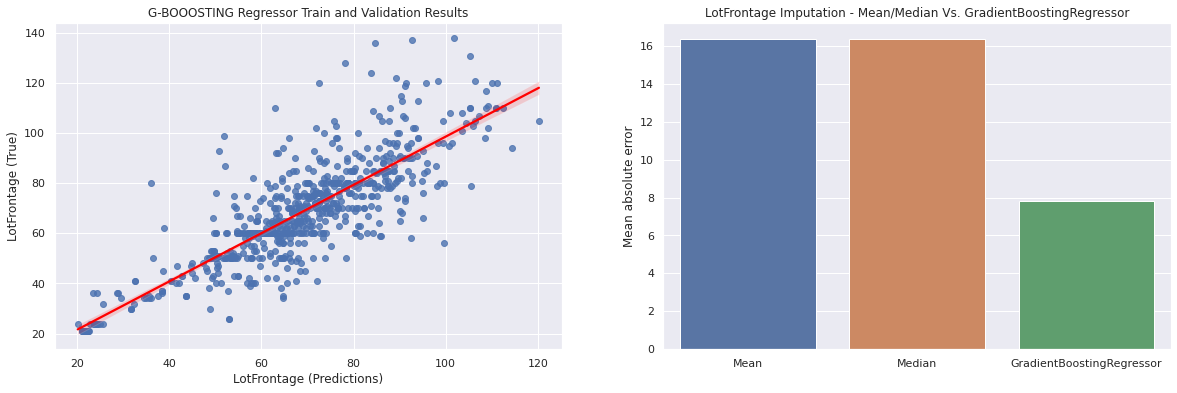

In [26]:
#Plotting train/validation results
fig, ax= plt.subplots(1,2,figsize=(20,6))
#Show results
sns.regplot(x=y_pred,y=y_valid, line_kws={'color':'red'} , ax=ax[0]).set(title='G-BOOOSTING Regressor Train and Validation Results',xlabel='LotFrontage (Predictions)',ylabel='LotFrontage (True)')
sns.barplot(x=["Mean","Median","GradientBoostingRegressor"],y=[Mean_result,Median_result,GBoost_results], ax=ax[1]).set(title='LotFrontage Imputation - Mean/Median Vs. GradientBoostingRegressor',ylabel='Mean absolute error')

In [27]:
#Predicting Missing values for Lotfrontage
LotFrontage_Test=Scaler_L.transform(LotFrontage_Test)
LotFrontage_missings=model.predict(LotFrontage_Test)

#Fill Missing values
all_df.loc[~mask,'LotFrontage']=LotFrontage_missings

In [28]:
#Exploring dataset to discover missing values
all_df.describe().T.sort_values(by='count').head(10)

,count,mean,std,min,25%,50%,75%,max
GarageYrBlt,2760.0,1978.113406,25.574285,1895.0,1960.0,1979.0,2002.0,2207.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtHalfBath,2917.0,0.061364,0.245687,0.0,0.0,0.0,0.0,2.0
BsmtFullBath,2917.0,0.429894,0.524736,0.0,0.0,0.0,1.0,3.0
GarageCars,2918.0,1.766621,0.761624,0.0,1.0,2.0,2.0,5.0
GarageArea,2918.0,472.874572,215.394815,0.0,320.0,480.0,576.0,1488.0
TotalBsmtSF,2918.0,1051.777587,440.766258,0.0,793.0,989.5,1302.0,6110.0
BsmtUnfSF,2918.0,560.772104,439.543659,0.0,220.0,467.0,805.5,2336.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


In [29]:
# Cheking GarageType where GarageYrBlt is missing 
all_df[['GarageYrBlt','GarageType']].loc[all_df.GarageYrBlt.isnull()]

,GarageYrBlt,GarageType
39,NaN,NA
48,NaN,NA
78,NaN,NA
88,NaN,NA
89,NaN,NA
...,...,...
2893,NaN,NA
2909,NaN,NA
2913,NaN,NA
2914,NaN,NA


In [30]:
# fill GarageYrBlt missings with the mean
all_df['GarageYrBlt'].fillna(0, inplace=True)

In [31]:
#fill with median or 0
all_df['BsmtHalfBath'].fillna(all_df.BsmtHalfBath.median(), inplace=True)
all_df['BsmtFullBath'].fillna(all_df.BsmtFullBath.median(), inplace=True)
all_df['GarageCars'].fillna(0, inplace=True)
all_df['TotalBsmtSF'].fillna(all_df.TotalBsmtSF.median(), inplace=True)
all_df['BsmtUnfSF'].fillna(0 , inplace=True)
all_df['BsmtFinSF2'].fillna(all_df.BsmtFinSF2.median(), inplace=True)
all_df['GarageArea'].fillna(0, inplace=True)
all_df['BsmtFinSF1'].fillna(all_df.BsmtFinSF1.median(), inplace=True)
all_df['MasVnrArea'].fillna(all_df['MasVnrArea'].median(), inplace=True)


In [32]:
#Saving dataframe
all_df.to_csv('Imputed_data_all.csv')

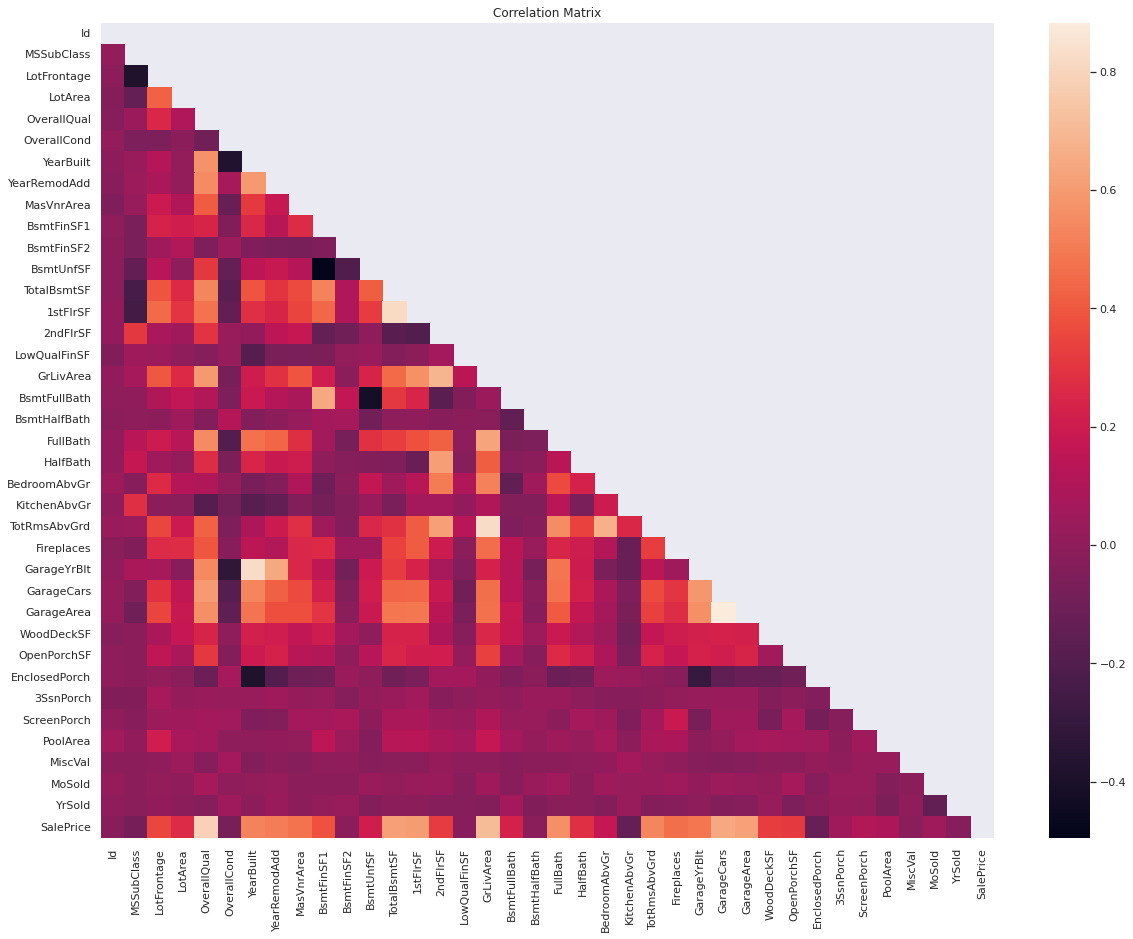

In [33]:
#Get the correlation matrix
corr=train.corr()

# Getting the Upper Triangle of the co-relation matrix
UpperT = np.triu(corr)
plt.figure(figsize=(20,15))
plt.title('Correlation Matrix')
sns.heatmap(corr, mask=UpperT)

In [34]:
#Getting sorted correlation between features and SalePrice 
train.corrwith(target).sort_values(ascending=False).head(50)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float

In [35]:
def highly_correlated(df, features, threshold=0.5):
    corr_df = df[features].corr() # get correlations
    correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    correlation_df={}
    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold)
    else:
        for v, i, j in s_corr_list:
            correlation_df[corr_df.index[i] +" and "+ corr_df.columns[j]]= v
        correlation_df=pd.DataFrame(correlation_df,index=['Correlation'])
    return  correlation_df.T.sort_values(by='Correlation',ascending=False)

In [36]:
#print correlation between features
highly_correlated(all_df,all_df.columns).style.set_properties(**{'background-color': 'black','color': 'white'})

,Correlation
GarageCars and GarageArea,0.889890
GrLivArea and TotRmsAbvGrd,0.808354
TotalBsmtSF and 1stFlrSF,0.801638
BedroomAbvGr and TotRmsAbvGrd,0.669737
2ndFlrSF and GrLivArea,0.655085
BsmtFinSF1 and BsmtFullBath,0.638911
GrLivArea and FullBath,0.630286
YearBuilt and YearRemodAdd,0.612235
2ndFlrSF and HalfBath,0.611362
OverallQual and GarageCars,0.600743


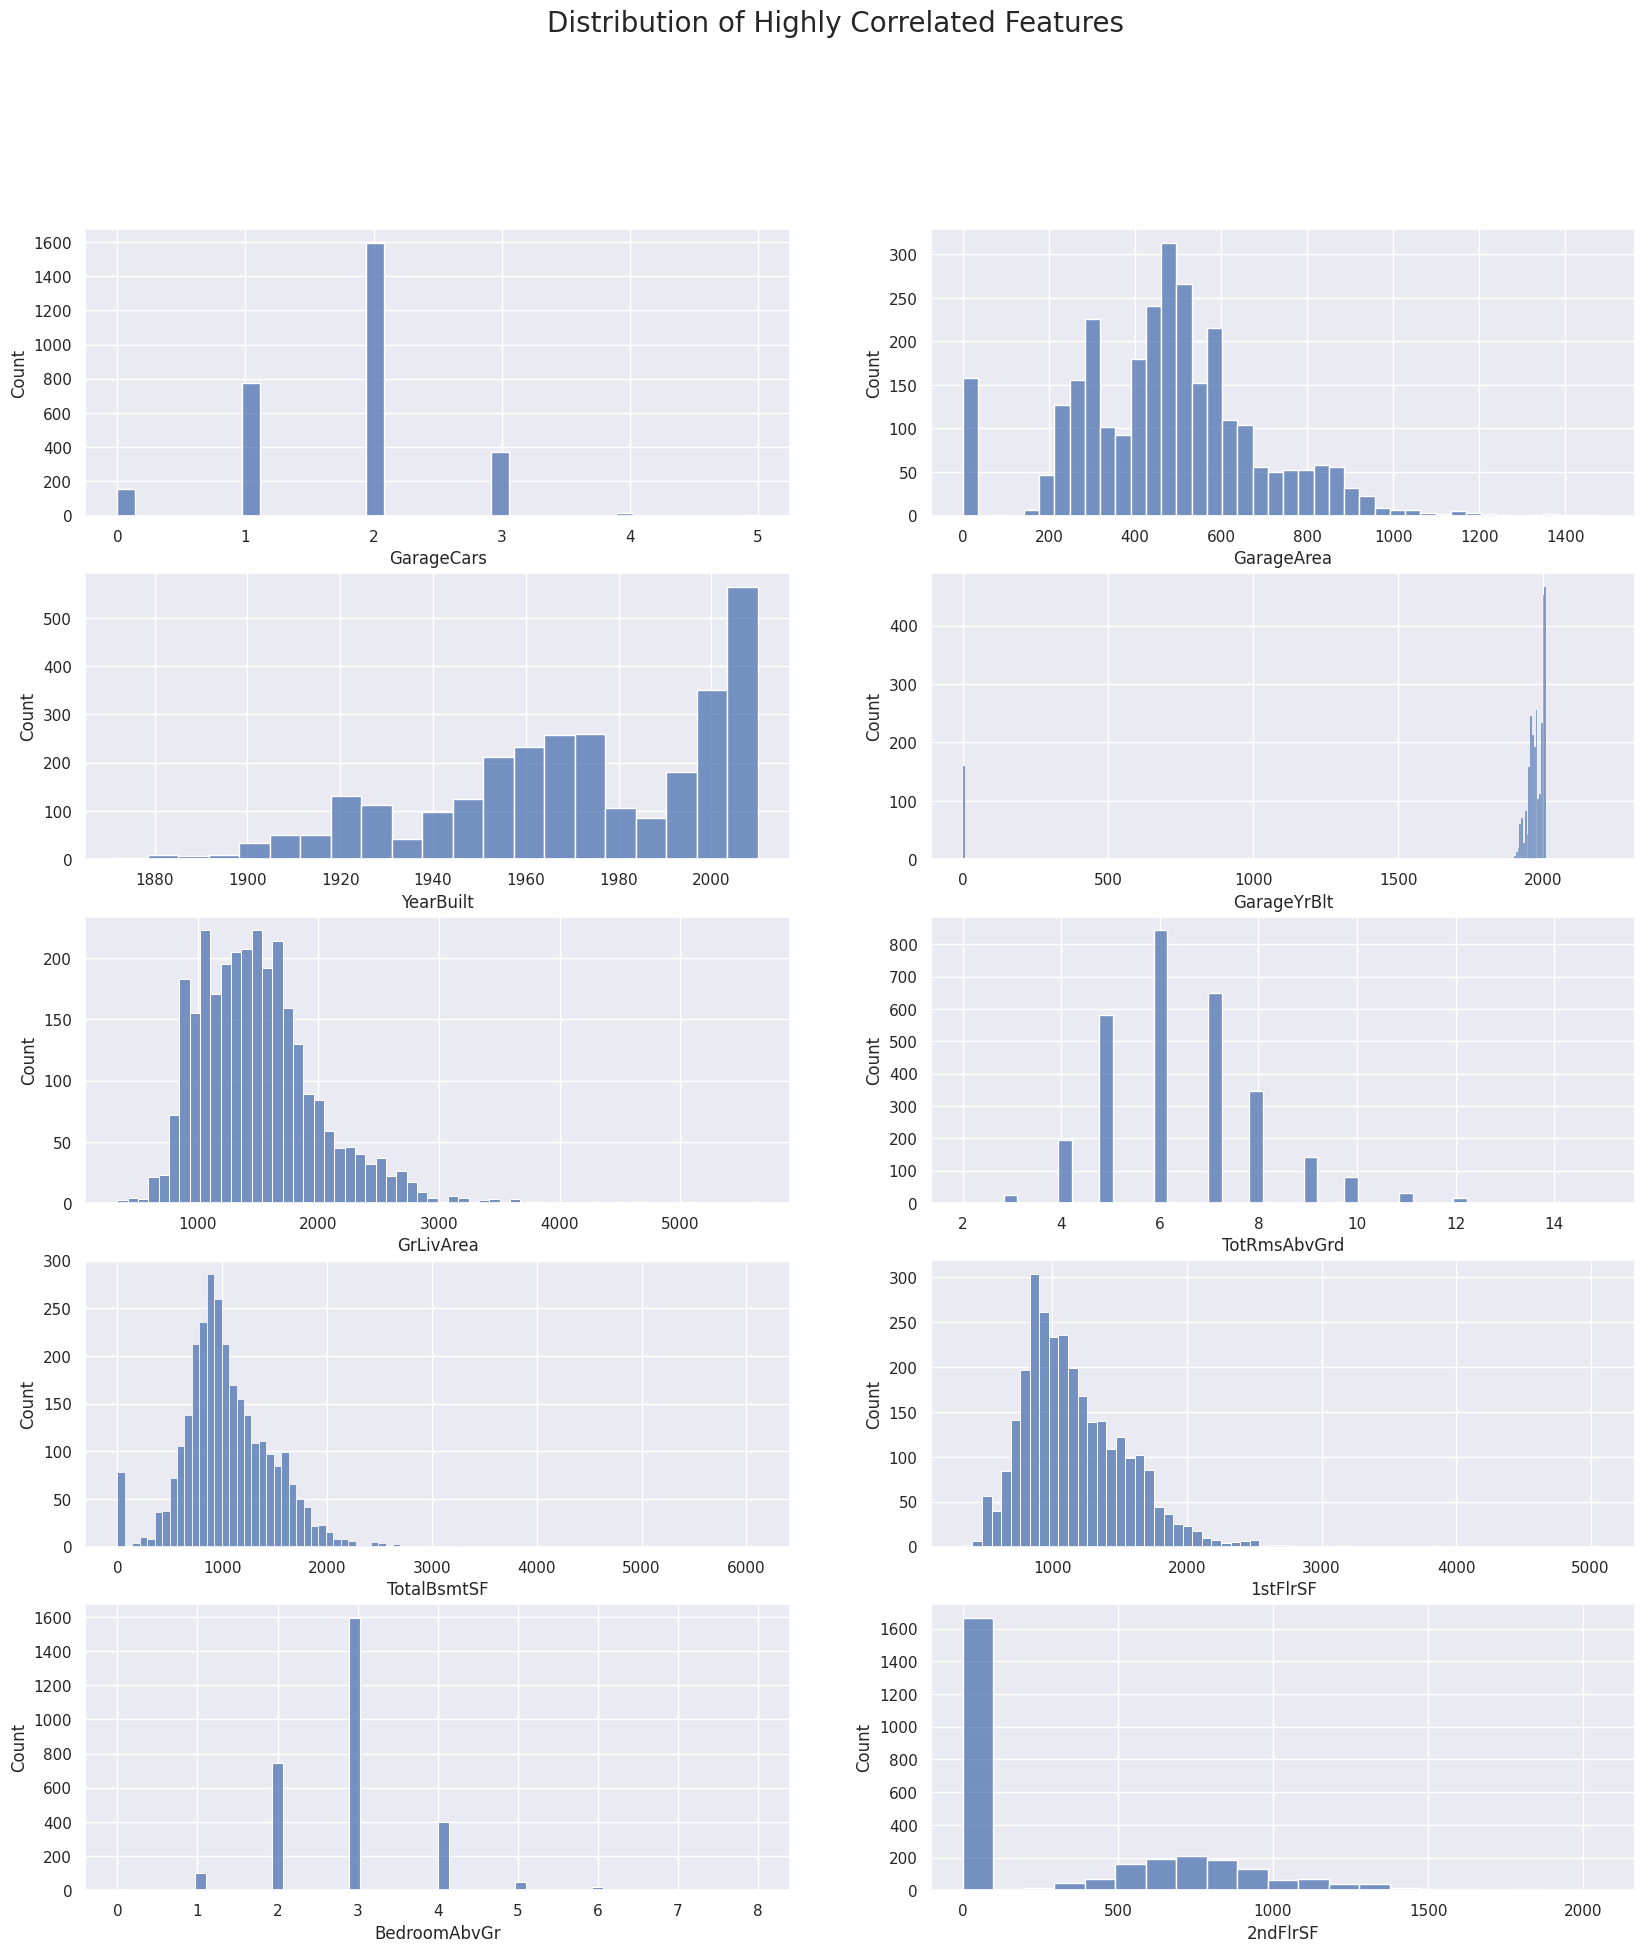

In [37]:
#plotting histogram chart for highly correlated features 
fig, ax = plt.subplots(5,2,figsize=(20,22),dpi=100)
fig.suptitle('Distribution of Highly Correlated Features',size=20)
sns.histplot(all_df['GarageCars'],ax=ax[0,0])
sns.histplot(all_df.GarageArea,ax=ax[0,1])
sns.histplot(all_df.YearBuilt,ax=ax[1,0])
sns.histplot(all_df.GarageYrBlt ,ax=ax[1,1])
sns.histplot(all_df.GrLivArea,ax=ax[2,0])
sns.histplot(all_df['TotRmsAbvGrd'],ax=ax[2,1])
sns.histplot(all_df['TotalBsmtSF'],ax=ax[3,0])
sns.histplot(all_df['1stFlrSF'],ax=ax[3,1])
sns.histplot(all_df['BedroomAbvGr'],ax=ax[4,0])
sns.histplot(all_df['2ndFlrSF'],ax=ax[4,1])

In [38]:
#Creating a copy of data
all_df_copy=all_df.copy()
#Drop GarageYrBlt
all_df_copy.drop('GarageYrBlt', axis=1,inplace=True)

In [39]:
all_df_copy['Log_GrLivArea'] = all_df_copy['GrLivArea'].apply(np.log)
all_df_copy['Log_1stFlrSF'] = all_df_copy['1stFlrSF'].apply(np.log) 
all_df_copy['Log_LotFrontage']= all_df_copy['LotFrontage'].apply(np.log) 
all_df_copy['Sqrt_LotArea']=all_df_copy['LotArea'].apply(np.log)   
all_df_copy['HouseAge']=all_df_copy['YrSold']-all_df_copy['YearBuilt']
all_df_copy['Total_Rooms']= all_df_copy['BedroomAbvGr'] + all_df_copy['TotRmsAbvGrd']  
all_df_copy['GrLivArea_Score']= np.sqrt(all_df_copy['OverallQual']) * all_df_copy['GrLivArea']
all_df_copy['Total_Square_Feet'] = all_df_copy.TotalBsmtSF + all_df_copy['1stFlrSF'] + all_df_copy['2ndFlrSF']
all_df_copy['Total_Porch'] = all_df_copy.ScreenPorch + all_df_copy.EnclosedPorch + all_df_copy.OpenPorchSF + all_df_copy.WoodDeckSF + all_df_copy['3SsnPorch']
all_df_copy['OverallQualCond'] = (all_df_copy['OverallCond'] * all_df_copy.OverallQual)
all_df_copy['BsmtFinSF']=all_df_copy['BsmtFinSF1'] + all_df_copy['BsmtFinSF2'] 
all_df_copy['TotalBath_Abv']=2*all_df_copy['FullBath']+all_df_copy['HalfBath']*0.5
all_df_copy['TotalBath_Bsmt']=2*all_df_copy['BsmtFullBath']+all_df_copy['BsmtHalfBath']*0.5

In [40]:
tmp_cols=all_df_copy.columns[all_df_copy.isin(['Gd']).any()]
tmp_cols

Index(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
       'PoolQC'],
      dtype='object')

In [41]:
#Make a dict
marks = {'No':0,'None':0,'NA':0,'Mn':1,'Av':3, "Po": 1, 'Fa': 2, "TA": 3, 'Gd': 4, 'Ex': 5}
#Apply map for each column
for column in tmp_cols:
    all_df_copy[column]=all_df_copy[column].map(marks)

In [42]:
all_df_copy['Exter_Overall'] = all_df_copy['ExterCond'] * all_df_copy['ExterQual']
all_df_copy['Garage_Overall'] = all_df_copy['GarageQual'] * all_df_copy['GarageCond']

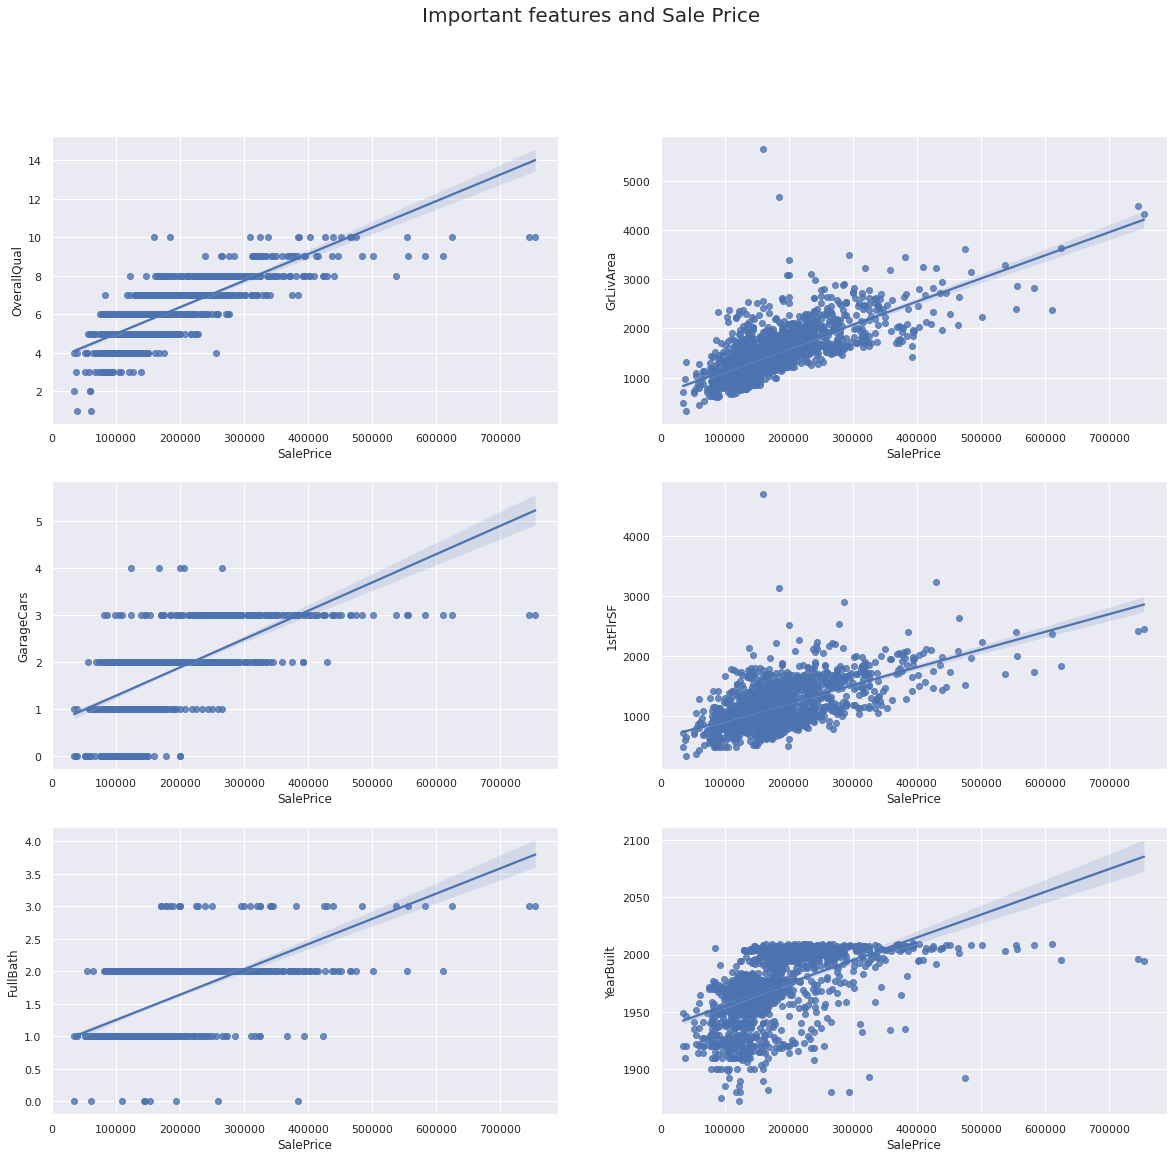

In [43]:
#plotting most correlated features based on SalePrice
fig, ax = plt.subplots(3,2,figsize=(20,18))
fig.suptitle('Important features and Sale Price',size=20)
sns.regplot(x=target,y=all_df_copy[:1460].OverallQual,ax=ax[0,0])
sns.regplot(x=target,y=all_df_copy[:1460].GrLivArea,ax=ax[0,1])
sns.regplot(x=target,y=all_df_copy[:1460].GarageCars,ax=ax[1,0])
sns.regplot(x=target,y=all_df_copy[:1460]['1stFlrSF'],ax=ax[1,1])
sns.regplot(x=target,y=all_df_copy[:1460].FullBath,ax=ax[2,0])
sns.regplot(x=target,y=all_df_copy[:1460]['YearBuilt'],ax=ax[2,1])

Text(0.5, 1.0, 'SalePrice - Log-Scale')

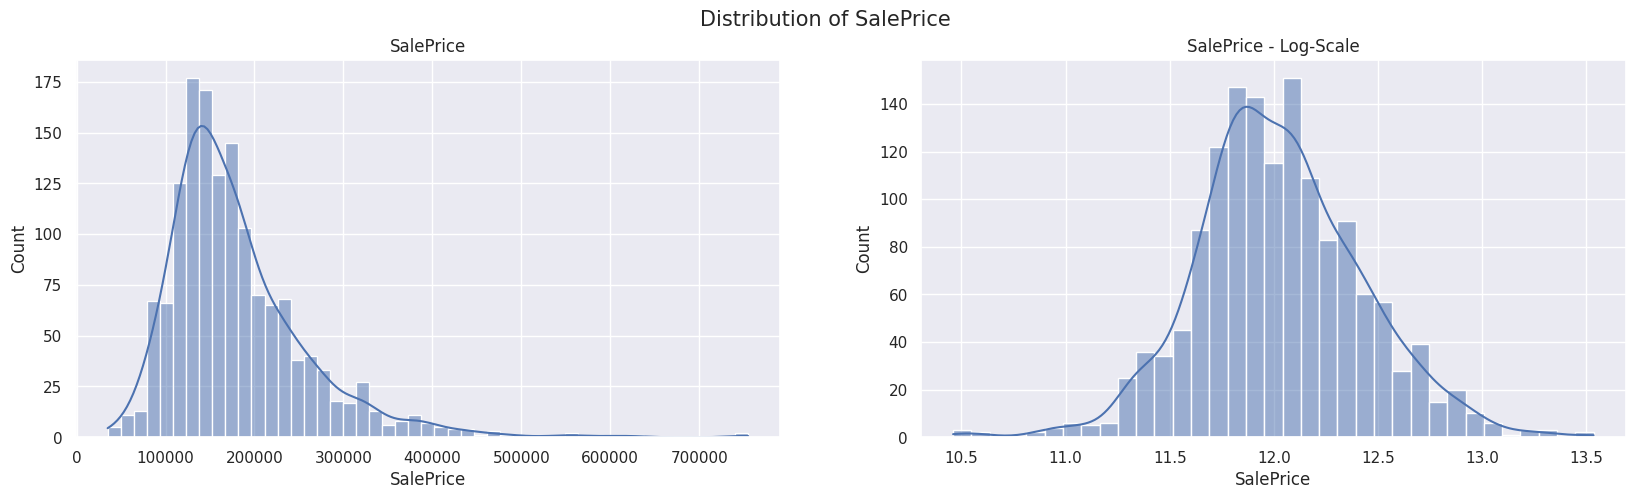

In [44]:
#Plotting Sale Price distribiution
fig,ax=plt.subplots(1,2,figsize=(20,5),dpi=100)
fig.suptitle('Distribution of SalePrice',size=15)
sns.histplot(target, ax=ax[0],kde=True).set_title('SalePrice')
sns.histplot(target.apply(np.log),kde=True, ax=ax[1]).set_title('SalePrice - Log-Scale')

In [45]:
#taking SalePrice into logarithmic scale
target=target.apply(np.log)

In [46]:
#Create copy
all_df_copy_en=all_df_copy.copy()

#Converting objects data type to category data type
for key,value in all_df_copy_en.items():
    if pd.api.types.is_string_dtype(value):
        all_df_copy_en[key] = value.astype("category").cat.as_ordered()

In [47]:
#Replace categories with their code
for key,value in all_df_copy_en.items():
     if not pd.api.types.is_numeric_dtype(value):
        all_df_copy_en[key] = pd.Categorical(value).codes+1
        

In [48]:
#Drop id column
all_df_copy_en.drop('Id',axis=1,inplace=True)
#Split data after encoding
train_df=all_df_copy_en[:1460].copy()
train_df['SalePrice']=target
test_df=all_df_copy_en[1460:].copy()

In [49]:
#columns for z-score calculation
numeric_columns=train_df.columns 
#Calculating z-score using stats library
z = np.abs(stats.zscore( train_df[numeric_columns]))

In [50]:
#Removing outliers on temporary dataframe
train_df_z=train_df.copy()[(z < 10).all(axis=1)]

print('Rows,columns Before removing outliers : ', train_df.shape )
print('Rows,columns After removing outliers : ', train_df_z.shape )

Rows,columns Before removing outliers :  (1460, 94)
Rows,columns After removing outliers :  (1422, 94)


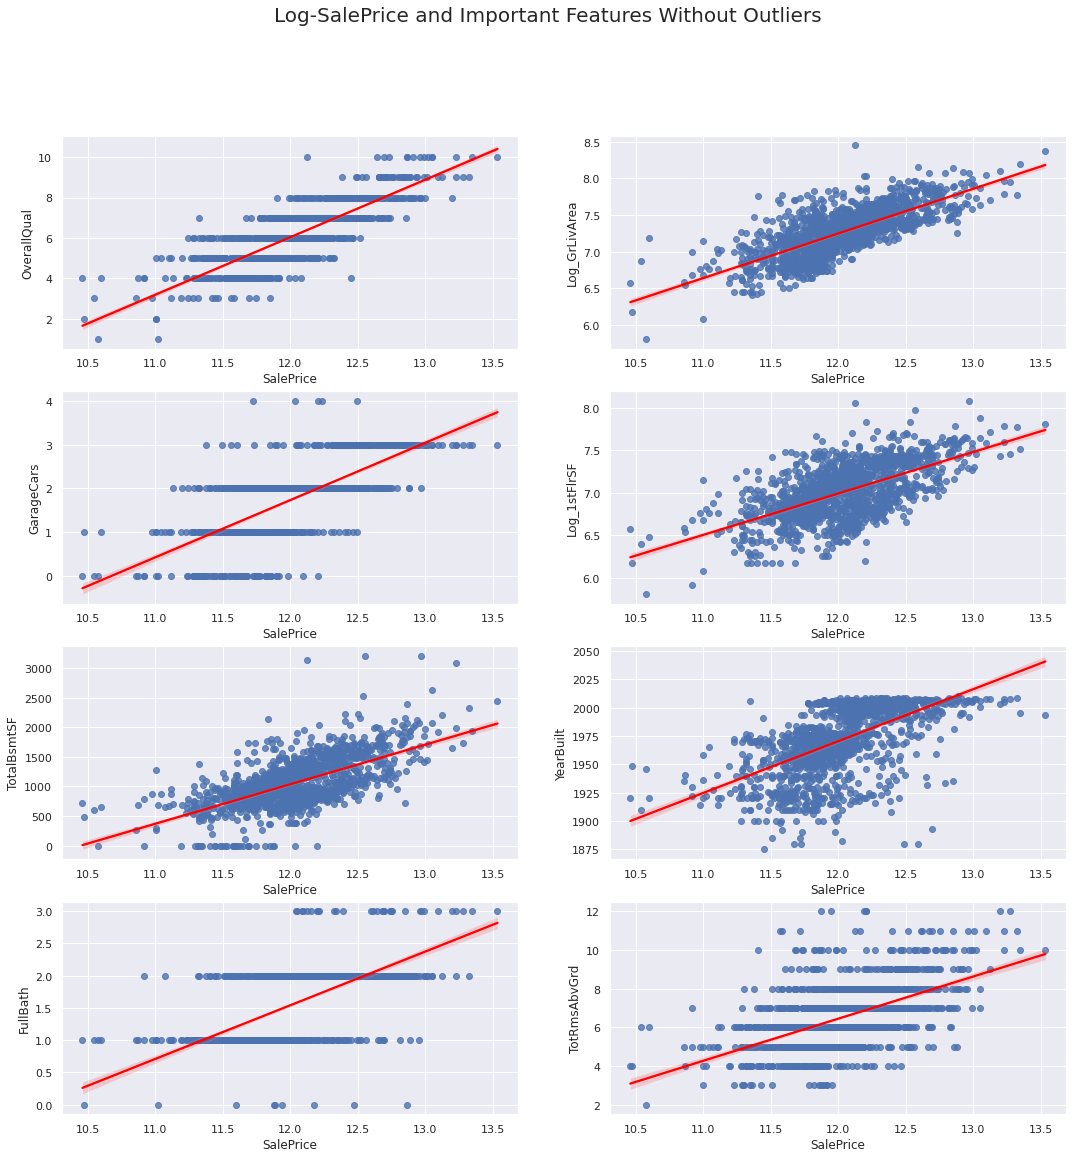

In [51]:
#plotting important features
fig, ax = plt.subplots(4,2,figsize=(18,18))
fig.suptitle('Log-SalePrice and Important Features Without Outliers', size=20)
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z.OverallQual,ax=ax[0,0], line_kws={'color':'red'})
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z.Log_GrLivArea,ax=ax[0,1], line_kws={'color':'red'})
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z.GarageCars,ax=ax[1,0], line_kws={'color':'red'})
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z['Log_1stFlrSF'],ax=ax[1,1], line_kws={'color':'red'})
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z.TotalBsmtSF ,ax=ax[2,0], line_kws={'color':'red'})
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z['YearBuilt'],ax=ax[2,1], line_kws={'color':'red'})
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z.FullBath ,ax=ax[3,0], line_kws={'color':'red'})
sns.regplot(x=train_df_z['SalePrice'],y=train_df_z['TotRmsAbvGrd'],ax=ax[3,1], line_kws={'color':'red'})

In [52]:
#Add features to dropFullBath
to_drop=['SalePrice','Fence',
                    'HalfBath',
                    'FullBath',
                    'BsmtFullBath',
                     'BsmtHalfBath',
                     'LotConfig',
                     'Foundation',
                     'BsmtFinSF2',
                     'LotShape',
                     'MSSubClass',
                     'PoolArea',
                     'LandContour',
                     'LandSlope',
                     'BsmtHalfBath',
                     'MasVnrArea',
                     'PavedDrive',
                     'GarageFinish',
                     'MasVnrType',
                     'HeatingQC',
                     'SaleType',
                     '3SsnPorch',
                     'PoolQC',
                     'ScreenPorch',
                     'MiscFeature',
                     'Street',
                     'MiscVal',
                     'GarageArea',
                     'YearRemodAdd',
                     'YearBuilt',
                     'LotArea',
                     'GrLivArea',
                     'LotFrontage',
                     'RoofMatl',
                     'Alley',
                     'RoofStyle',
                     'Heating',
                     'BsmtFinType2',
                     'BsmtFinType1',
                     'LowQualFinSF',
                     'MoSold', 
                     '1stFlrSF',
                     '2ndFlrSF',
                     'OverallQual',
                     'OverallCond',
                     'TotalBsmtSF',
                     'YrSold',
                     'BsmtFinSF1',
                     'ExterCond',
                     'ExterQual',
                     'GarageQual',
                     'GarageCond',
                     'BsmtFinSF2']
#will be dropped from test data
to_drop_t=to_drop[1:]

In [53]:
#Independent variables 
X=train_df_z.drop(to_drop,axis=1)
#Dependent variable
y=train_df_z['SalePrice']

#scaling features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#spliting train dataset to train and validation
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [54]:
# evaluate a given model by making predictions on X_valid
def get_v_score(model):
    valid_predictions=model.predict(X_valid)
    score=np.sqrt(mean_squared_error(y_valid, valid_predictions))
    return score

# evaluate a given model using cross-validation
def get_cv_score(model, X, y):
    #cv = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1))
    return np.mean(scores)

In [55]:
# Models name
models_name=['RandomForestRegressor',
             'GradientBoostingRegressor',
             'XGBRegressor',
             'svm.SVR',
             'ExtraTreesRegressor',
             'Lasso']
# Models
models=[RandomForestRegressor(),
        GradientBoostingRegressor(),
        XGBRegressor(),
        svm.SVR(),
        ExtraTreesRegressor(),
        Lasso(alpha=0.0005,tol=0.001)]

In [56]:
#Fit and get scores for each model
scores_list=[]
for model in models:
    model.fit(X_train,y_train)
    scores_list.append(get_v_score(model))

[08:46:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [57]:
#Convert list to dataframe
data={'Model':models_name,'RMSE': scores_list}
scores_df=pd.DataFrame(data)
#Sort by valid RMSLE
scores_df.sort_values(by='RMSE').round(5).style.set_properties(**{'background-color': 'black','color': 'white'})

,Model,RMSE
2,XGBRegressor,0.103110
1,GradientBoostingRegressor,0.107100
5,Lasso,0.107540
4,ExtraTreesRegressor,0.114510
0,RandomForestRegressor,0.116250
3,svm.SVR,0.127390


In [58]:
# get a stacking ensemble of models
def get_stacking():
   
    # define the base models with tuned parameters
    level0 = list()
    level0.append(('GBOOST', GradientBoostingRegressor(min_samples_split=90, min_samples_leaf=26)))
    level0.append(('RandomForest', RandomForestRegressor(min_samples_split=14, min_samples_leaf=8)))
    level0.append(('XGB', XGBRegressor(colsample_bytree=0.6, gamma=0.4 )))
    level0.append(('ExtraTrees', ExtraTreesRegressor(min_samples_split=14, min_samples_leaf=2)))
    level0.append(('svm.SVR', svm.SVR(kernel='poly',gamma='scale',degree=1,coef0=0.30000000000000004)))
    level0.append(('ElasticNet', ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=0,tol=0.001)))
    level0.append(('Lasso', Lasso(alpha=0.0005, tol=0.001)))

    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

#Add to models list
models_name.append('StackingRegressor')
models.append(get_stacking())

In [59]:
#Fit stacked model and get validation score
Stackedmodel=get_stacking()
Stackedmodel.fit(X_train,y_train)
print('RMSE : ', get_v_score(Stackedmodel))

[08:47:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:47:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.09999421465080582


Text(0, 0.5, 'True values')

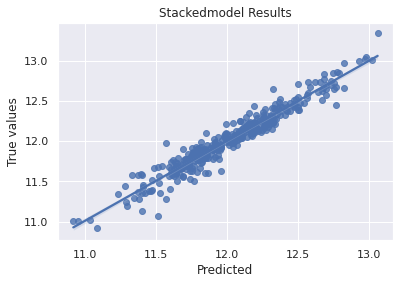

In [60]:
y_pred=Stackedmodel.predict(X_valid)
sns.regplot(x=y_pred, y=y_valid).set_title("Stackedmodel Results")
plt.xlabel("Predicted")
plt.ylabel("True values")

Text(0.5, 1.0, 'Feature Importance')

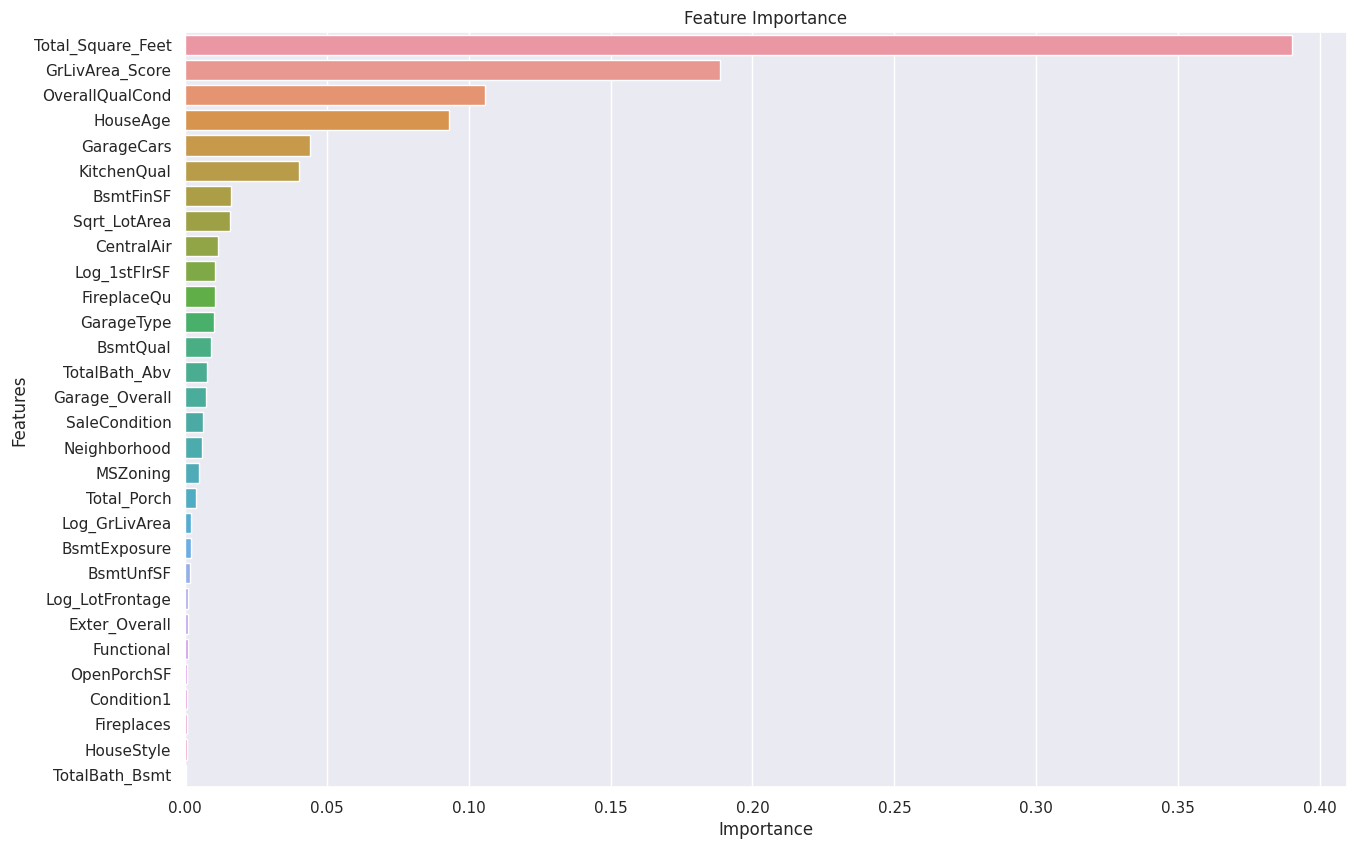

In [61]:
Gboost=GradientBoostingRegressor(min_samples_split=26, min_samples_leaf=29)
Gboost.fit(X_train,y_train)

#create feature importance dataframe
FI_df=pd.DataFrame({'Features': X.columns, 'Importance': Gboost.feature_importances_})
FI_df=FI_df.sort_values(by='Importance', ascending=False).head(100)

#plot feature importance
plt.figure(figsize=(15,10),dpi=100)
sns.barplot(x=FI_df[:30].Importance,y=FI_df[:30].Features,orient = 'h').set_title('Feature Importance')

In [62]:
#Scaling Test data
test_df_Scaled=scaler.transform(test_df.drop(to_drop_t,axis=1))
#Getting predictions
test_df_preds=Stackedmodel.predict(test_df_Scaled)

#Adding Id column
test_preds=pd.DataFrame({'Id':test['Id'],'SalePrice':(np.exp(test_df_preds))})
test_preds

,Id,SalePrice
0,1461,126820.051133
1,1462,162024.472294
2,1463,175446.890275
3,1464,194955.566380
4,1465,189519.050399
...,...,...
1454,2915,87416.841604
1455,2916,82114.244066
1456,2917,151081.198285
1457,2918,125409.120437
